<a href="https://colab.research.google.com/github/RaulEcheverryLopez/eda_couse-Analisis-Expliratorio1/blob/RaulEcheverryLopez/Taller1Exploratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Taller Analisis Exploratorio 1
# Importamos las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Estilos


In [ ]:
df = pd.read_csv("Ejercicio prediccion de mora.csv", encoding="latin-1", sep=';')
df.head()

,Período,ID País,ID,BT Sucursal,BT Sub.Operac.,BT Tipo.Oper.,BT Módulo,Saldo,Origen.Cpt,Origen.Suc,...,Fecha Ingreso,Fecha Retiro,Estado Civil,Per. Gracia,Calif. Comercial,Calif. Riesgo,Calif. Riesgo x altura Mora,Calif. Reest. y Modif.,Importe Garantía,Porcentaje Garantizado
0,27/02/2024,169,1,80,0,1,113,-2255125.83,NaN,0,...,29/12/2023,/ /,Unión Libre,1,NaN,NaN,A,NaN,1344000.0,595.976
1,27/02/2024,169,1,80,0,0,404,13061.00,NaN,0,...,29/12/2023,/ /,Unión Libre,1,NaN,NaN,A,NaN,0.0,0.0000
2,27/02/2024,169,1,80,0,0,403,-57887.54,NaN,0,...,29/12/2023,/ /,Unión Libre,1,NaN,NaN,A,NaN,0.0,0.0000
3,27/02/2024,169,1,80,0,0,480,893.00,NaN,0,...,29/12/2023,/ /,Unión Libre,1,NaN,NaN,A,NaN,0.0,0.0000
4,27/02/2024,169,2,2,0,5,113,-4582000.00,NaN,0,...,16/02/2023,/ /,Casado/a,0,NaN,NaN,E,NaN,0.0,0.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601440 entries, 0 to 601439
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Período                      601440 non-null  object 
 1   ID País                      601440 non-null  int64  
 2   ID                           601440 non-null  int64  
 3   BT Sucursal                  601440 non-null  int64  
 4   BT Sub.Operac.               601440 non-null  int64  
 5   BT Tipo.Oper.                601440 non-null  int64  
 6   BT Módulo                    601440 non-null  int64  
 7   Saldo                        601440 non-null  float64
 8   Origen.Cpt                   24418 non-null   object 
 9   Origen.Suc                   601440 non-null  int64  
 10  Origen.Cod.Cli               601440 non-null  int64  
 11  Origen.Nro.Prod.             23581 non-null   object 
 12  Clasificación                601370 non-null  object 
 13 

In [ ]:
#eliminar duplicados ID de la Base de datos
df_sin_dup=df.drop_duplicates(['ID'], keep='first')
df_sin_dup.head()

,Período,ID País,ID,BT Sucursal,BT Sub.Operac.,BT Tipo.Oper.,BT Módulo,Saldo,Origen.Cpt,Origen.Suc,...,Fecha Ingreso,Fecha Retiro,Estado Civil,Per. Gracia,Calif. Comercial,Calif. Riesgo,Calif. Riesgo x altura Mora,Calif. Reest. y Modif.,Importe Garantía,Porcentaje Garantizado
0,27/02/2024,169,1,80,0,1,113,-2255125.83,NaN,0,...,29/12/2023,/ /,Unión Libre,1,NaN,NaN,A,NaN,1344000.00,595.976
4,27/02/2024,169,2,2,0,5,113,-4582000.00,NaN,0,...,16/02/2023,/ /,Casado/a,0,NaN,NaN,E,NaN,0.00,0.0000
7,27/02/2024,169,3,74,0,1,113,-1984773.21,NaN,0,...,22/09/2023,/ /,Soltero/a,1,NaN,NaN,A,NaN,1288000.00,648.941
10,27/02/2024,169,4,74,0,1,113,-548907.50,NaN,0,...,27/01/2023,/ /,Soltero/a,1,NaN,NaN,A,NaN,274453.75,500.000
14,27/02/2024,169,5,57,0,1,113,-2000000.00,NaN,0,...,7/02/2024,/ /,Soltero/a,0,NaN,NaN,A,NaN,1800000.00,900.000


In [ ]:
#informacion de la Base sin duplicados
df_sin_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143039 entries, 0 to 601437
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Período                      143039 non-null  object 
 1   ID País                      143039 non-null  int64  
 2   ID                           143039 non-null  int64  
 3   BT Sucursal                  143039 non-null  int64  
 4   BT Sub.Operac.               143039 non-null  int64  
 5   BT Tipo.Oper.                143039 non-null  int64  
 6   BT Módulo                    143039 non-null  int64  
 7   Saldo                        143039 non-null  float64
 8   Origen.Cpt                   21543 non-null   object 
 9   Origen.Suc                   143039 non-null  int64  
 10  Origen.Cod.Cli               143039 non-null  int64  
 11  Origen.Nro.Prod.             20734 non-null   object 
 12  Clasificación                143007 non-null  object 
 13  Días

In [ ]:
# Creamos un nuevo dataset en donde seleccionamos las columnas que usaremos para el analisis
df_base=df_sin_dup[["ID","BT Sucursal","Antigüedad","Sexo","Descrip. CIUU","Sector Actividad","Plazo Meses","Destino","Edad","Días Vencido"]]
df_base.head()

,ID,BT Sucursal,Antigüedad,Sexo,Descrip. CIUU,Sector Actividad,Plazo Meses,Destino,Edad,Días Vencido
0,1,80,2,1.0,Comercio al por mayor de productos alimenticios,COMERCIO,12,Activo fijo,24,0
4,2,2,2,1.0,Cultivo de cafe,AGRICULTURA,23,Capital de trabajo,34,137
7,3,74,2,1.0,"Comercio menor prd farmaceut y medicinal, en e...",COMERCIO,20,Capital de trabajo,23,0
10,4,74,2,2.0,Otras industrias manufactureras n.c.p.,ARTESANÍAS,16,Capital de trabajo,22,0
14,5,57,2,1.0,Otras actividades de servicios personales n.c.p.,SERVICIOS,14,Capital de trabajo,21,0


In [ ]:
# Creamos un nuevo dataset en donde seleccionamos las columnas que usaremos para el analisis
df_base=df_sin_dup[["ID","BT Sucursal","Antigüedad","Sexo","Sector Actividad","Plazo Meses","Destino","Edad","Personas a Cargo","Calif. Comercial","Días Vencido"]]
df_base.head()

,ID,BT Sucursal,Antigüedad,Sexo,Sector Actividad,Plazo Meses,Destino,Edad,Personas a Cargo,Calif. Comercial,Días Vencido
0,1,80,2,1.0,COMERCIO,12,Activo fijo,24,0,NaN,0
4,2,2,2,1.0,AGRICULTURA,23,Capital de trabajo,34,1,NaN,137
7,3,74,2,1.0,COMERCIO,20,Capital de trabajo,23,0,NaN,0
10,4,74,2,2.0,ARTESANÍAS,16,Capital de trabajo,22,0,NaN,0
14,5,57,2,1.0,SERVICIOS,14,Capital de trabajo,21,0,NaN,0


In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143039 entries, 0 to 601437
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                143039 non-null  int64  
 1   BT Sucursal       143039 non-null  int64  
 2   Antigüedad        143039 non-null  int64  
 3   Sexo              142795 non-null  float64
 4   Sector Actividad  143037 non-null  object 
 5   Plazo Meses       143039 non-null  int64  
 6   Destino           130006 non-null  object 
 7   Edad              143039 non-null  int64  
 8   Personas a Cargo  143039 non-null  int64  
 9   Calif. Comercial  0 non-null       float64
 10  Días Vencido      143039 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 13.1+ MB


In [ ]:
df_base["Sexo"]=df_base["Sexo"].replace({1:"Mujer",2:"Hombre",3:"Hombre",4:"Hombre", "nan":"Hombre"})
df_base["Sexo"].replace(np.nan, "Hombre", inplace=True)
df_base["Sexo"]=df_base["Sexo"].astype("str")
df_base["Sexo"].value_counts()


C:\Users\Lenovo YOGA\AppData\Local\Temp\ipykernel_17544\1115100081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base["Sexo"]=df_base["Sexo"].replace({1:"Mujer",2:"Hombre",3:"Hombre",4:"Hombre", "nan":"Hombre"})
C:\Users\Lenovo YOGA\AppData\Local\Temp\ipykernel_17544\1115100081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base["Sexo"].replace(np.nan, "Hombre", inplace=True)
C:\Users\Lenovo YOGA\AppData\Local\Temp\ipykernel_17544\1115100081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Sexo
Hombre    72130
Mujer     70909
Name: count, dtype: int64

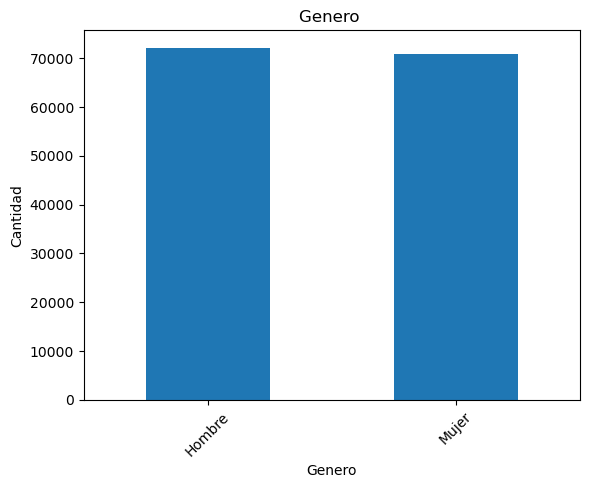

In [ ]:
#Visualization
df_base["Sexo"].value_counts().plot(kind="bar")
plt.title("Genero ")
plt.xlabel("Genero")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

de la población analizada se puede observar en que la proporción en género es muy similar

In [ ]:
Mora=[]
for i in df_base["Días Vencido"]:
    if i>0:
       Mora.append(1)
    else:
        Mora.append(0)

In [ ]:
Mora

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
df_base["Mora"]=Mora

C:\Users\Lenovo YOGA\AppData\Local\Temp\ipykernel_17544\4097788769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base["Mora"]=Mora


In [ ]:
df_base

,ID,BT Sucursal,Antigüedad,Sexo,Sector Actividad,Plazo Meses,Destino,Edad,Personas a Cargo,Calif. Comercial,Días Vencido,Mora
0,1,80,2,Mujer,COMERCIO,12,Activo fijo,24,0,NaN,0,0
4,2,2,2,Mujer,AGRICULTURA,23,Capital de trabajo,34,1,NaN,137,1
7,3,74,2,Mujer,COMERCIO,20,Capital de trabajo,23,0,NaN,0,0
10,4,74,2,Hombre,ARTESANÍAS,16,Capital de trabajo,22,0,NaN,0,0
14,5,57,2,Mujer,SERVICIOS,14,Capital de trabajo,21,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601422,143035,26,2,Mujer,COMERCIO,18,NaN,35,3,NaN,0,0
601426,143036,8,2,Mujer,COMERCIO,12,NaN,32,1,NaN,0,0
601430,143037,102,2,Mujer,COMERCIO,12,NaN,42,2,NaN,0,0
601433,143038,10,2,Hombre,COMERCIO,24,NaN,67,0,NaN,0,0


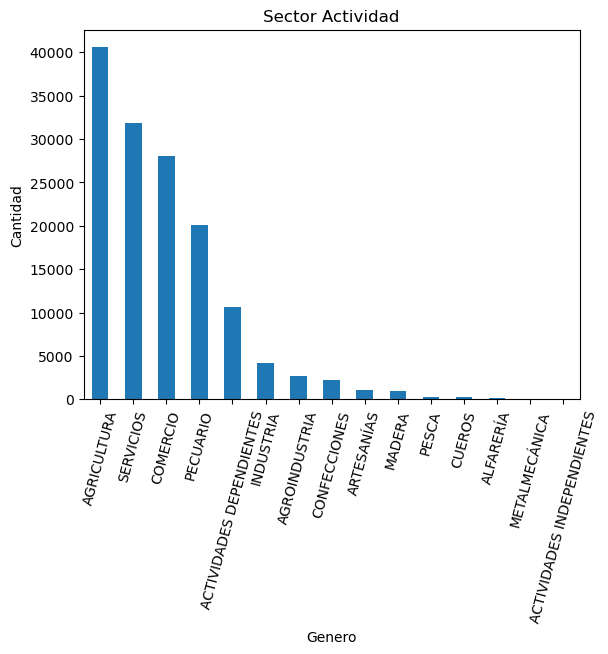

In [ ]:
    #Visualization sector laboral
    df_base["Sector Actividad"].value_counts().plot(kind="bar")
    plt.title("Sector Actividad")
    plt.xlabel("Genero")
    plt.xticks(rotation=75)
    plt.ylabel("Cantidad")
    plt.show()

Text(0.5, 1.0, 'Histograma de edades')

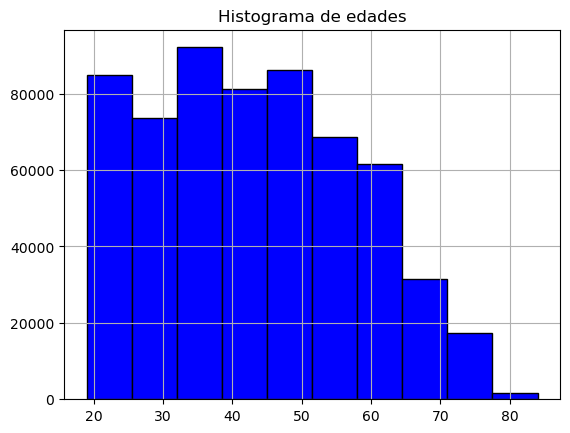

In [ ]:
avg_edad = df["Edad"].astype("float").mean()
df[df['Edad'] <= 18] = np.nan
df[df['Edad'] >= 85] = np.nan
df.Edad.hist(color = 'blue', edgecolor = 'black', bins = int(50/5))
plt.title("Histograma de edades")

c:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


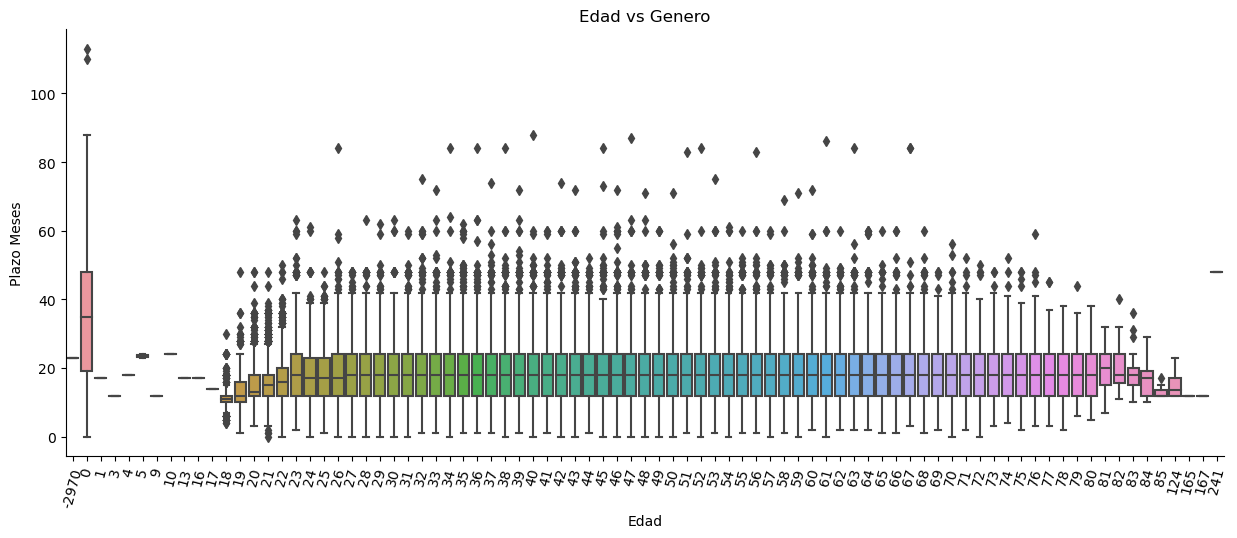

In [ ]:
sns.catplot(x="Edad", y="Plazo Meses", data=df_base, kind="box", aspect=2.5)
plt.title("Edad vs Genero")
plt.xticks(rotation=75)
plt.show()

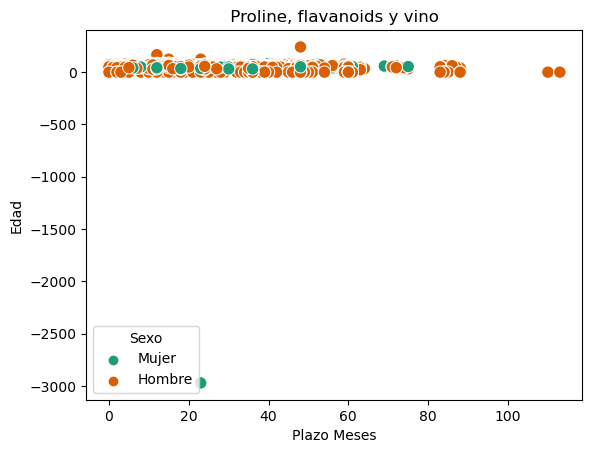

In [ ]:
sns.scatterplot(x="Plazo Meses", y="Edad", hue="Sexo", data=df_base, palette="Dark2", s=80)
plt.title(" Proline, flavanoids y vino ")
plt.show()

Analisis